In [1]:
%pylab inline
import pandas as pd
from plotnine import *

Populating the interactive namespace from numpy and matplotlib


/Users/mattspinnelli/anaconda3/envs/627py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('train.csv.gz', compression='gzip')
df.head()

from sklearn.model_selection import train_test_split


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


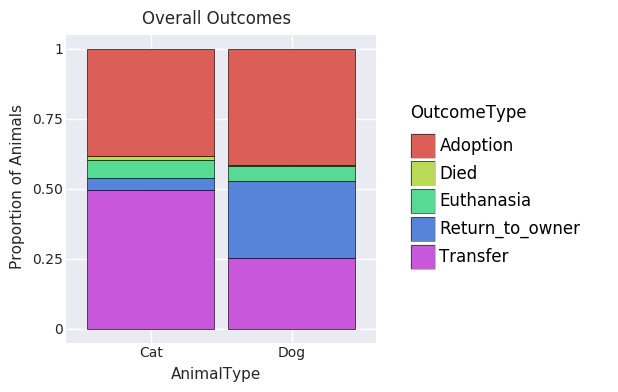

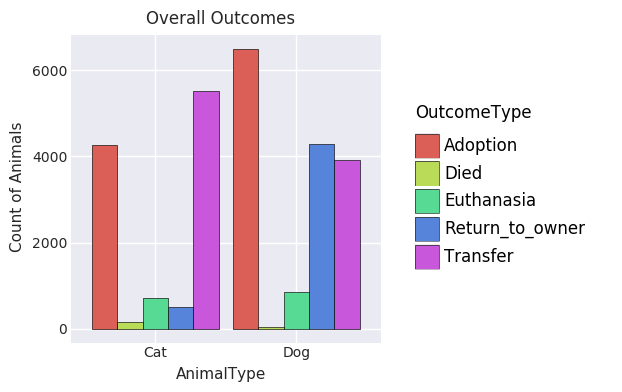

In [5]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
    + geom_bar(position = position, color = 'black', size=.25)
    + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
    + theme_seaborn()
    ).draw().set_size_inches(4,4)

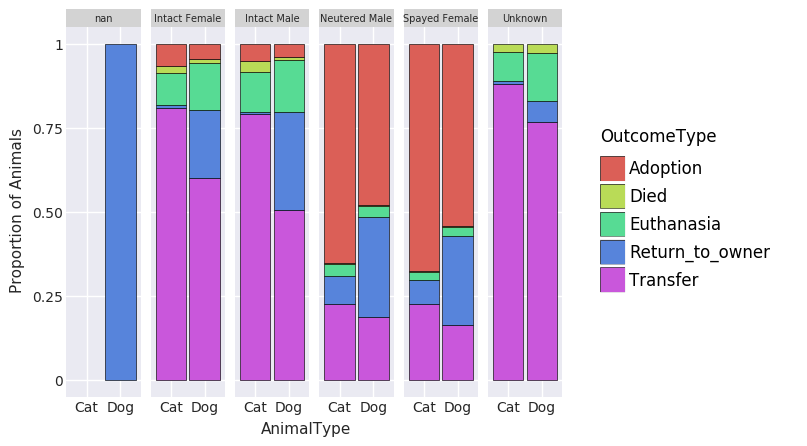

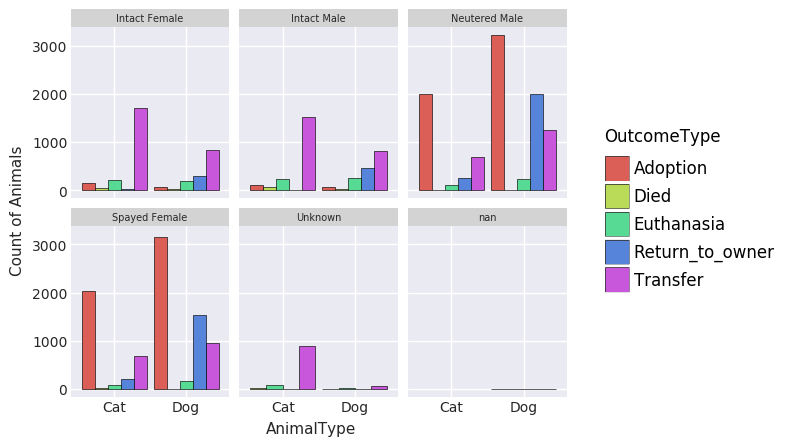

In [7]:
for (position, label) in [('fill', 'Proportion'), ('dodge', 'Count')]:
    p = (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
        + geom_bar(position = position, color = 'black', size=.25)
        + labs(y = '{} of Animals'.format(label))
        + theme_seaborn()
        + theme(strip_text_x = element_text(size = 7)))
    if position == 'fill':
        p += facet_grid('. ~ SexuponOutcome')
    else:
        p += facet_wrap('SexuponOutcome')
    p.draw()

In [8]:
df[df.SexuponOutcome.isnull()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3174,A667395,Diego,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


In [9]:
df.loc[3174].SexuponOutcome = 'Unknown'

In [10]:
M, F, U = 'Male', 'Female', 'Unknown'
def extract_sex(x):
    return M if M in str(x) else F if F in str(x) else U

N, S, I = 'Neutered', 'Spayed', 'Intact'    
def extract_genitals(x):
    return N if (N in str(x) or S in str(x)) else I if I in str(x) else U

df['Sex'] = df.SexuponOutcome.apply(extract_sex)
df['Genitals'] = df.SexuponOutcome.apply(extract_genitals)
 
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Genitals
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered


In [11]:
print("NaN count", len(df[df.AgeuponOutcome.isnull()]))

def convert_to_AgeInDays(x):
    if x is np.nan:
        return x
    numeric_portion, unit = str(x).split(' ')
    factor = {'year': 365, 'month': 30, 'week': 7, 'day': 1}
    return int(numeric_portion) * factor[unit.replace('s','')]

df['AgeInDays'] = df.AgeuponOutcome.map(convert_to_AgeInDays)

NaN count 18


In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median') # statsmodel.sandbox.MICE isn't avilable on kaggle
df.AgeInDays = imputer.fit_transform(pd.get_dummies(df.loc[:, ['AgeInDays']]))

In [65]:
def has_name (x): 
    name = False if not x else x is not np.nan
    return 'Named' if name else 'Unnamed'

df['HasName'] = df.Name.map(has_name)

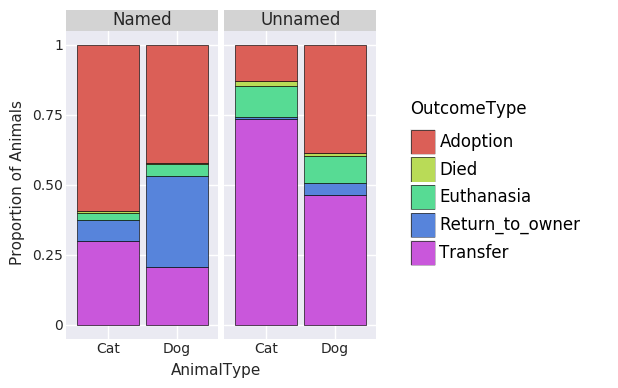

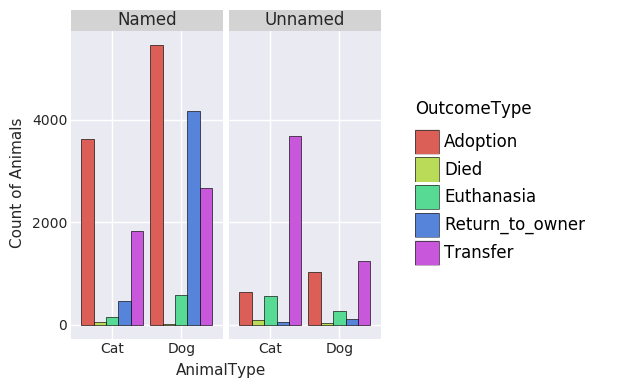

In [66]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_wrap('~HasName')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

In [21]:
column_names = sort(df.AgeInDays.astype(int).unique())
df['AgeInDaysCategorical'] = pd.Categorical(df.AgeInDays.astype(int), categories = column_names)

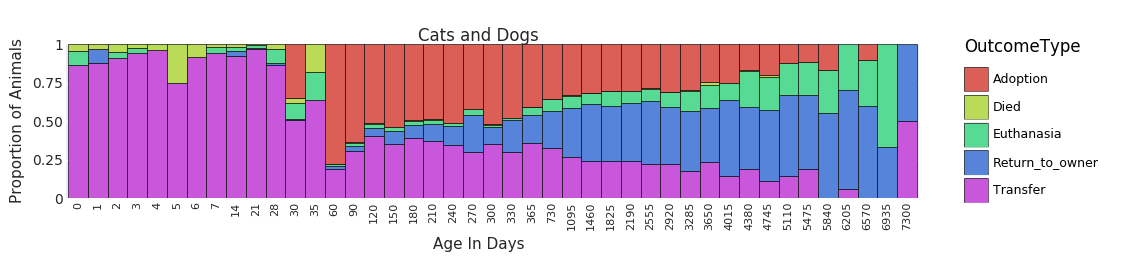

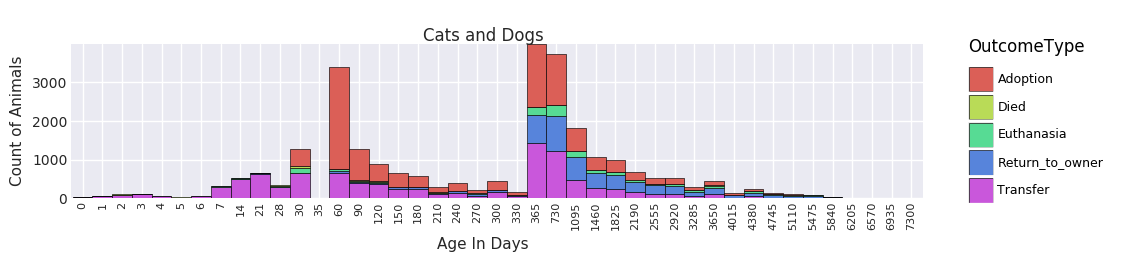

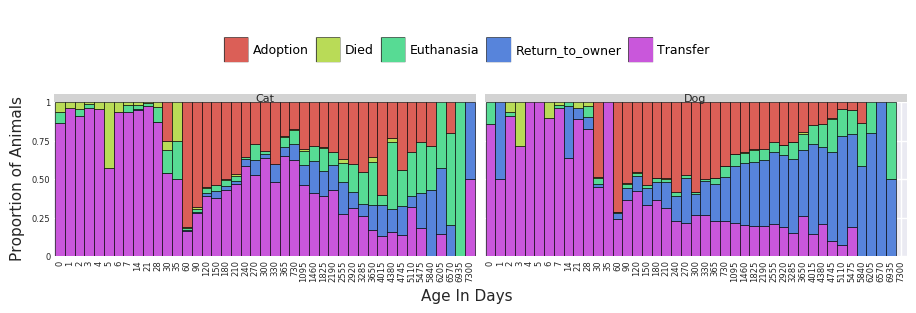

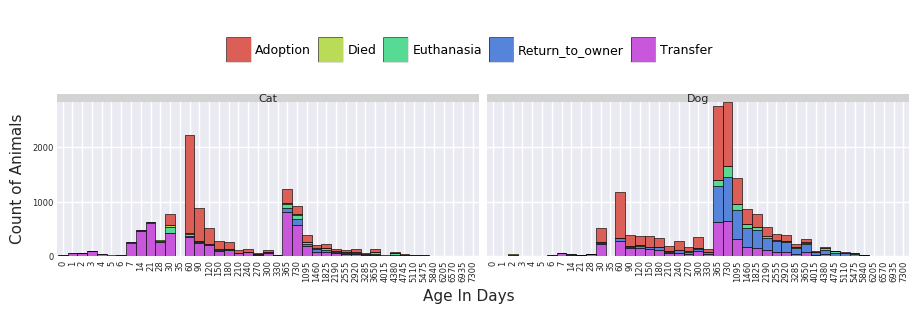

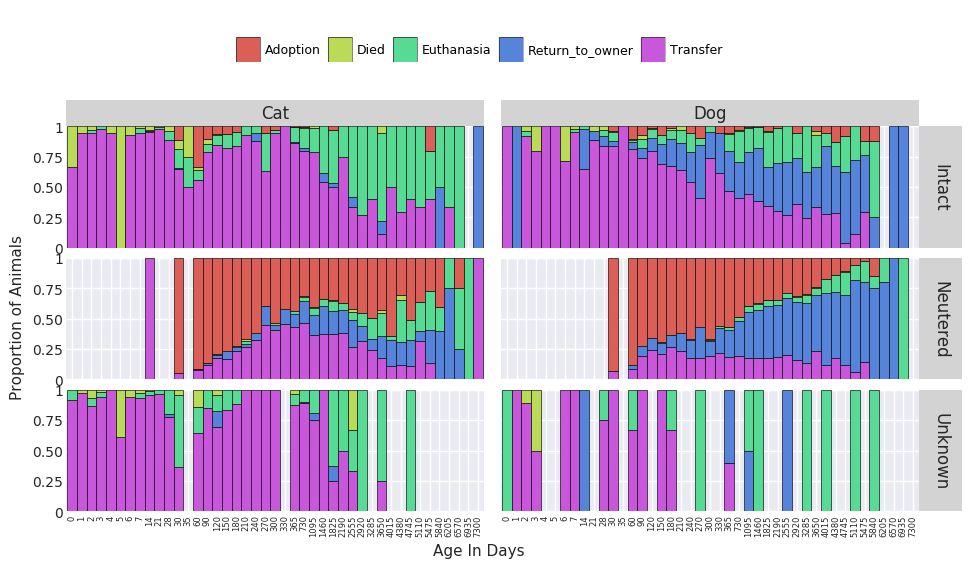

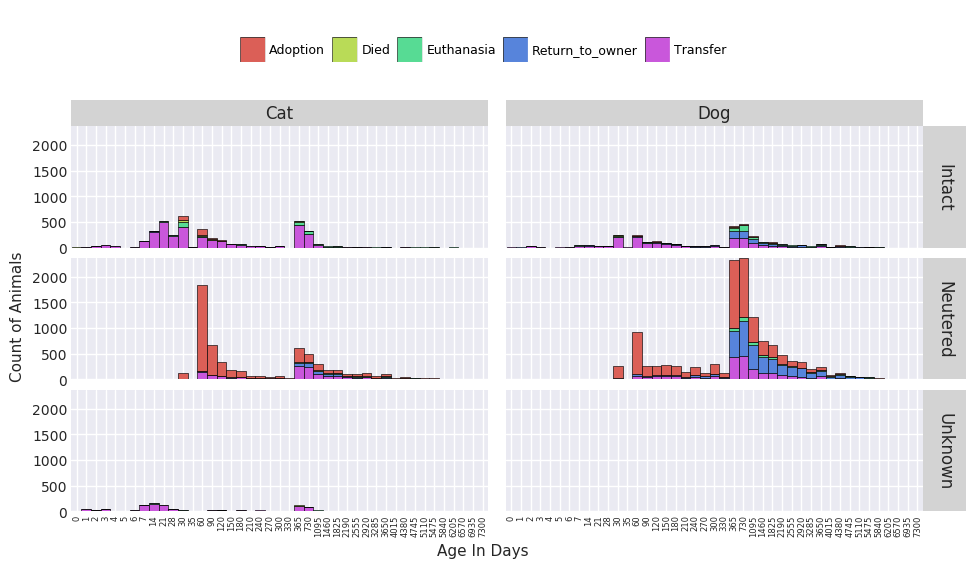

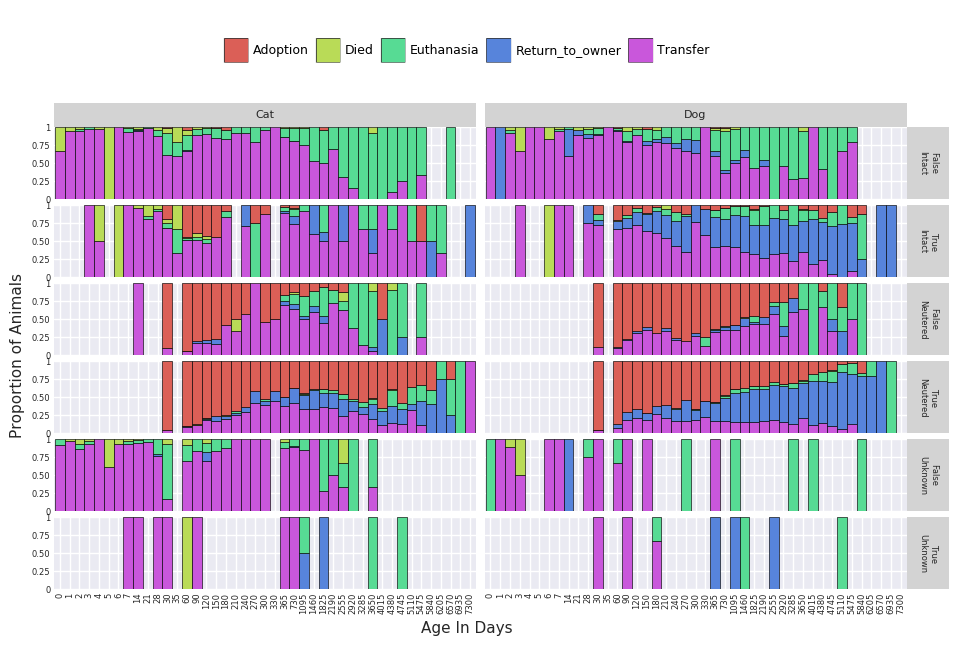

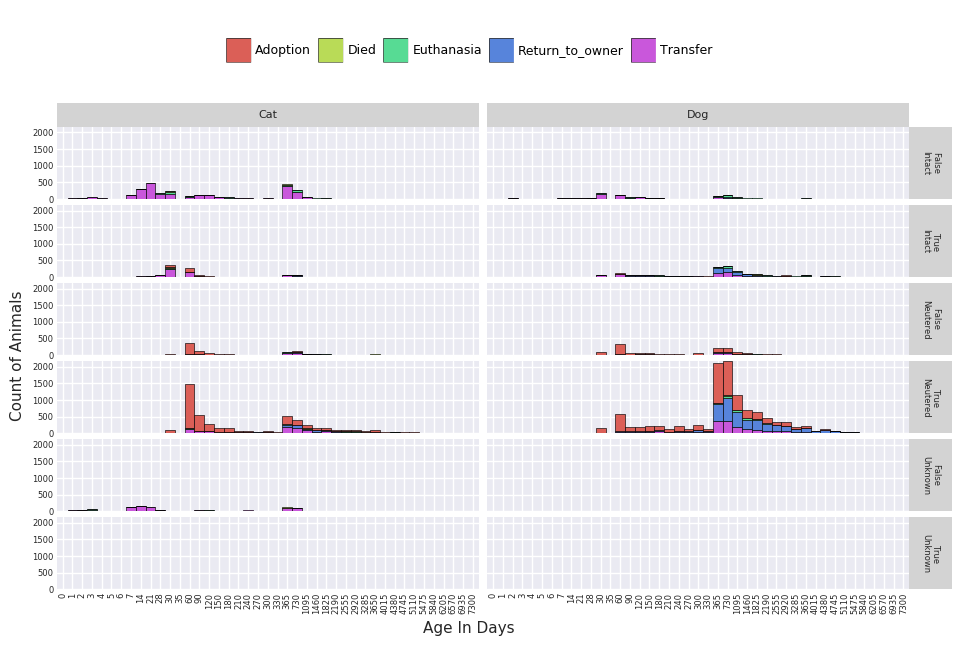

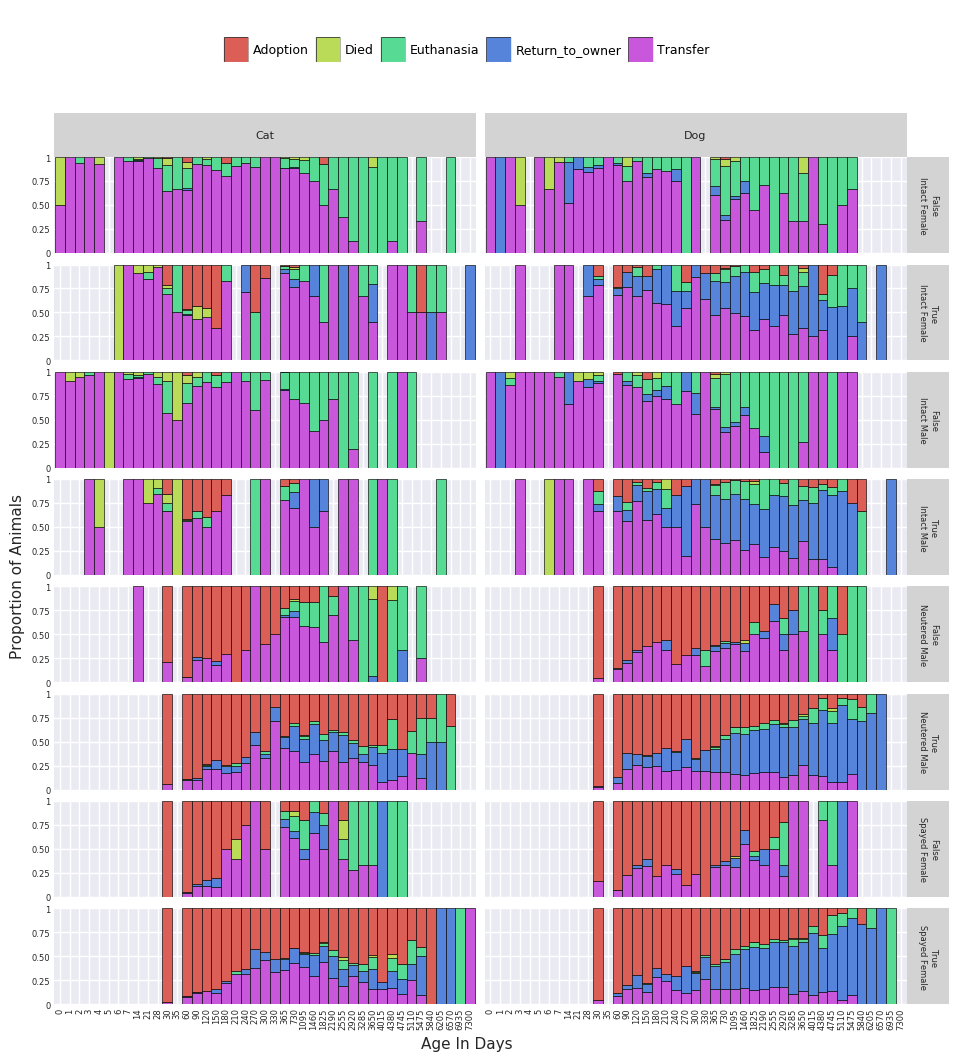

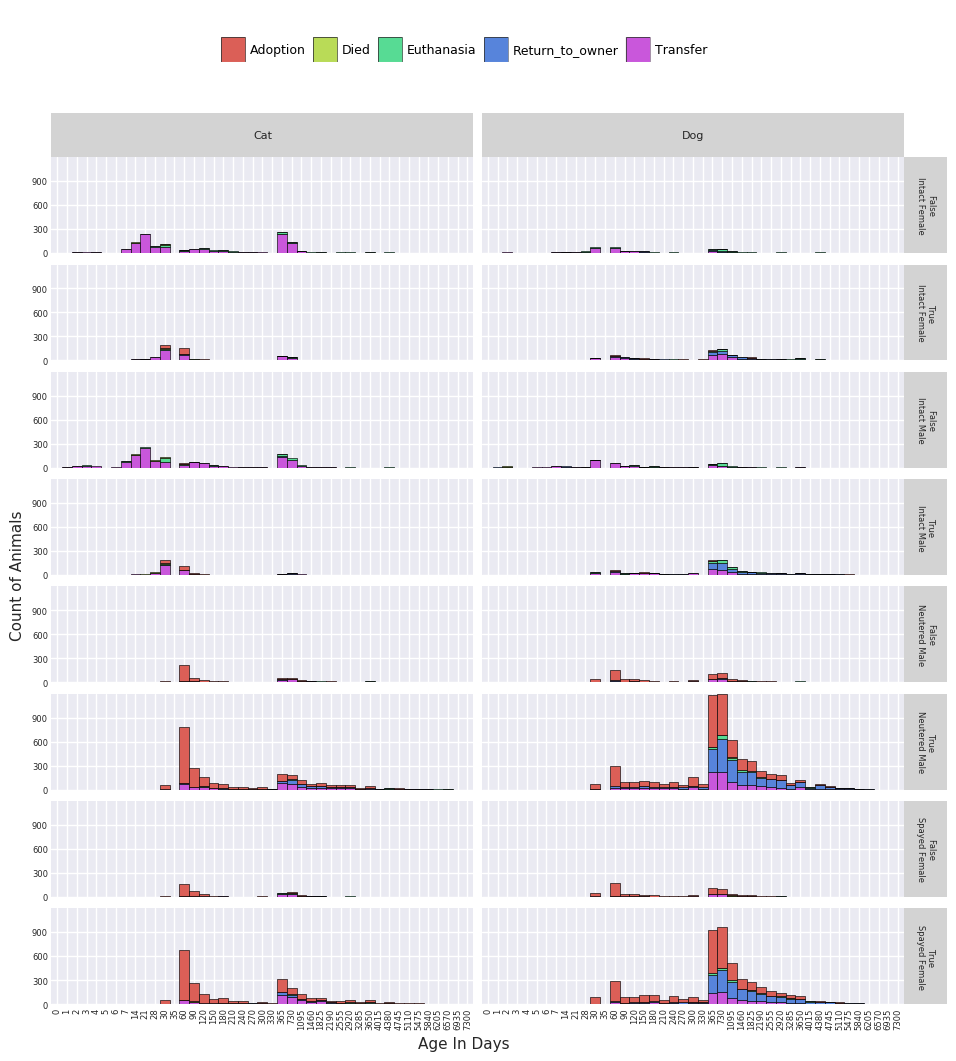

In [62]:
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label), title = 'Cats and Dogs')
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             panel_grid_minor = element_blank(),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11, 2)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('. ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             strip_text_x = element_text(size = 8),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,2)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p =(ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('Genitals ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             panel_grid_minor = element_blank(),
             legend_text=element_text(size=9),
             legend_position = 'top',
             legend_title = element_blank())
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,5)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('Genitals + HasName ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             strip_text_x = element_text(size = 8),             
             strip_text_y = element_text(size = 6),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,6)
    
# Unknown captured above so don't need to "zoom" in here
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df[df.SexuponOutcome != 'Unknown'], aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('SexuponOutcome + HasName ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             legend_text=element_text(size=9),
             strip_text_x = element_text(size = 8),
             strip_text_y = element_text(size = 6))
    )    
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,11)

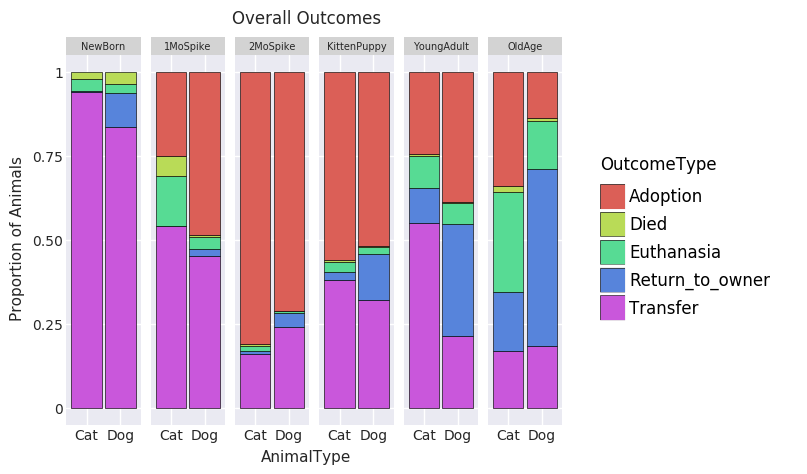

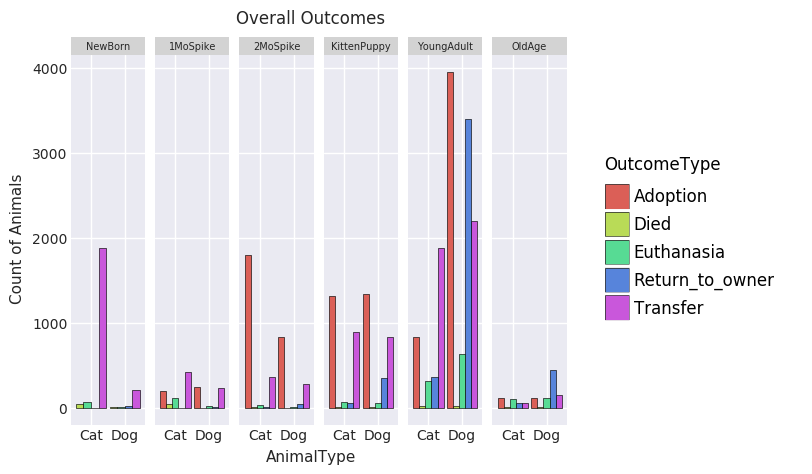

In [43]:
def stage(x):
    if x <= 28:
        return 'NewBorn'
    elif x > 28 and x <= 35:
        return '1MoSpike'
    elif x > 35 and x <= 60:
        return '2MoSpike'
    elif x > 60 and x < 365:
        return 'KittenPuppy'
    elif x >= 365 and x < 10 * 365:
        return 'YoungAdult'
    elif x >= 10 * 356:
        return 'OldAge'    
    
df['Stage'] = df.AgeInDays.map(stage)
df.Stage = pd.Categorical(df.Stage, categories=[
    'NewBorn', '1MoSpike', '2MoSpike', 'KittenPuppy', 'YoungAdult', 'Midlife', 'OldAge'])

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_grid('. ~ Stage')
     + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
     + theme_seaborn()
     + theme(strip_text_x = element_text(size = 7))
    ).draw()

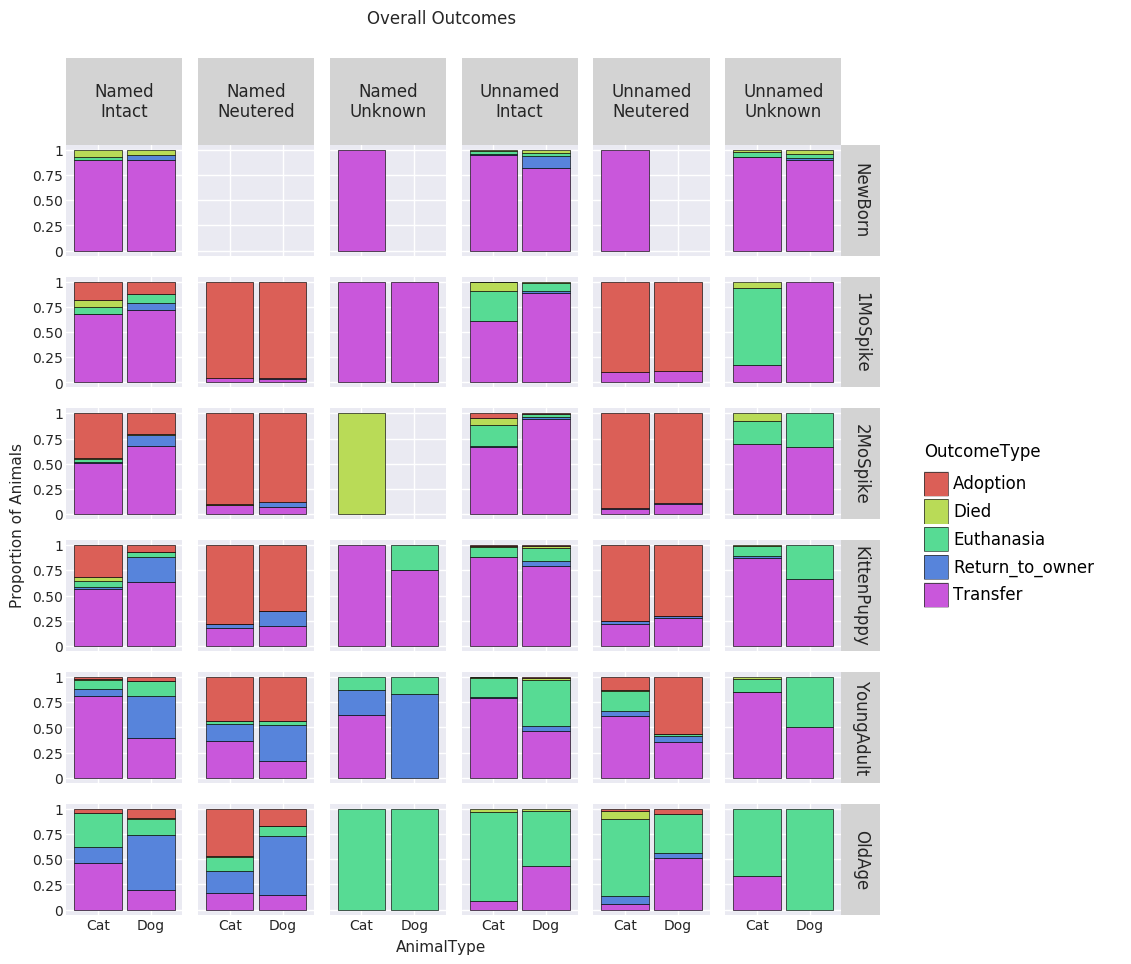

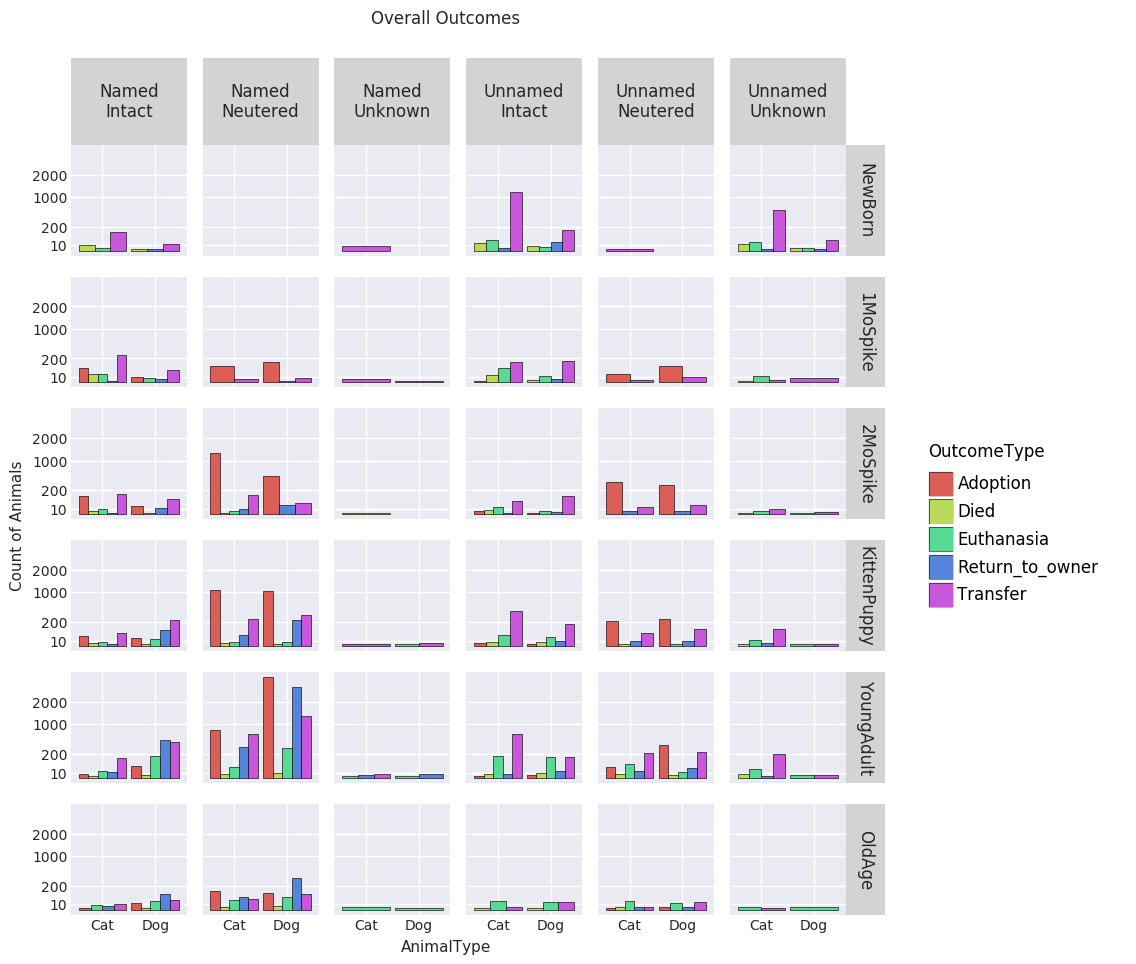

In [67]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    p = (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_grid('Stage ~ HasName + Genitals')
     + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
     + theme_seaborn()
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000))
    p.draw().set_size_inches(10,10)

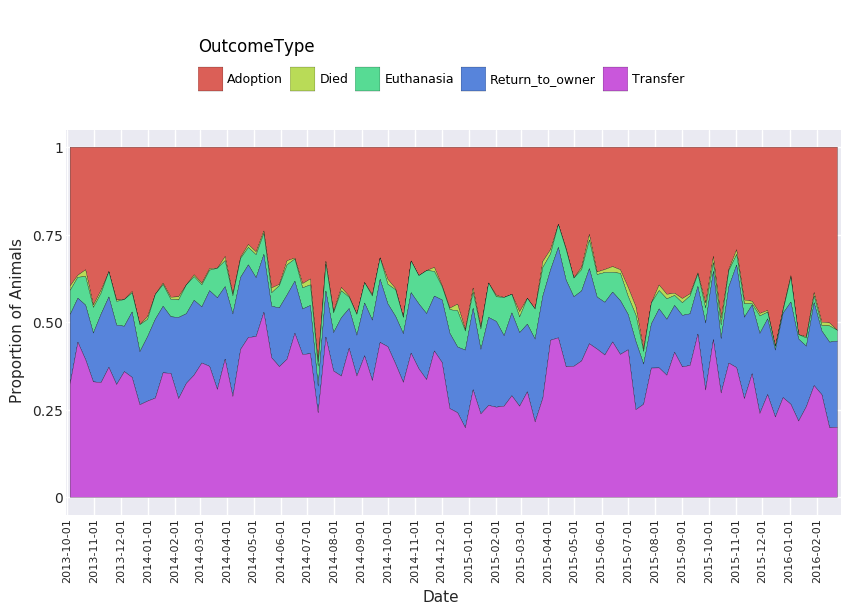

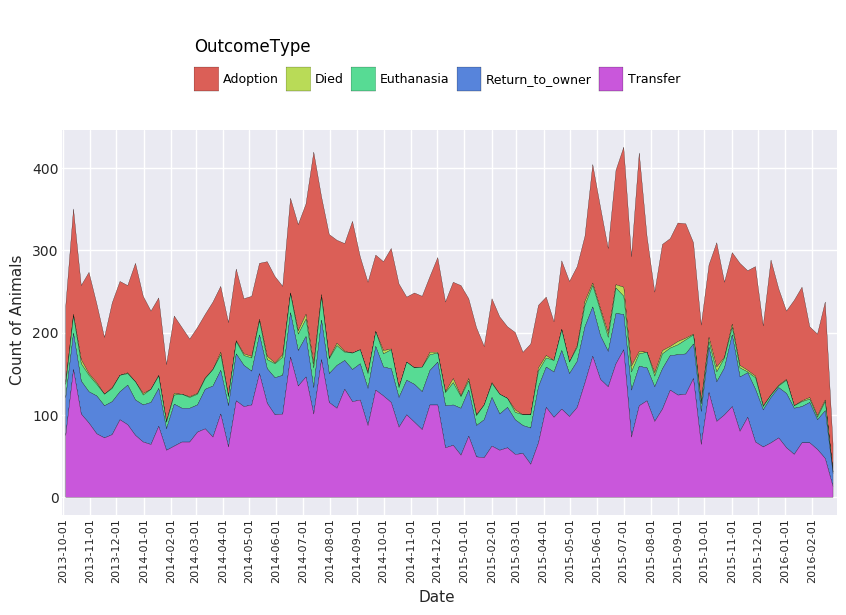

In [38]:
from datetime import datetime
from mizani.breaks import date_breaks
df['Date'] = df.DateTime.map(
    lambda x: x if x is nan else datetime.strptime(str(x).split(' ')[0], '%Y-%m-%d'))
df['Time'] = df.DateTime.map(
    lambda x: x if x is nan else datetime.strptime(str(x).split(' ')[1], '%H:%M:%S'))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'Date', fill ='OutcomeType'))
     + geom_area(stat='bin', bins=100, position = position, size=0.1, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + scale_x_datetime(breaks = date_breaks("1 Month"), expand=(0,0))
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(10, 5)

In [75]:
[print(x) for x in df.Breed.unique().tolist()]

Shetland Sheepdog Mix
Domestic Shorthair Mix
Pit Bull Mix
Lhasa Apso/Miniature Poodle
Cairn Terrier/Chihuahua Shorthair
American Pit Bull Terrier Mix
Cairn Terrier
Miniature Schnauzer Mix
Yorkshire Terrier Mix
Great Pyrenees Mix
Angora Mix
Flat Coat Retriever Mix
Queensland Heeler Mix
Plott Hound/Boxer
German Shepherd Mix
American Staffordshire Terrier Mix
Chihuahua Shorthair Mix
Russian Blue Mix
Labrador Retriever Mix
Collie Smooth/German Shepherd
Domestic Longhair Mix
Beagle
Pit Bull/Labrador Retriever
Blue Lacy Mix
Black Mouth Cur Mix
Dachshund/Beagle
Dachshund Mix
Maltese Mix
Pointer Mix
English Foxhound
Vizsla Mix
German Shepherd/Great Pyrenees
Cardigan Welsh Corgi/Chihuahua Shorthair
Domestic Longhair
Chow Chow/Pit Bull
Chihuahua Shorthair
Siamese Mix
Domestic Medium Hair Mix
Plott Hound Mix
Boxer/Great Dane
Lhasa Apso
Beagle/Treeing Walker Coonhound
Border Collie Mix
Border Terrier Mix
Boxer Mix
Cairn Terrier Mix
Dogo Argentino Mix
Beagle Mix
Chihuahua Shorthair/Dachshund
Miniat

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,